##### Created on 05/17/2022

##### This notebook is to get the GCM wind vs M relationship for the oceans over 30N to 70N. Will be compared with MERRA2+MAC and PPE outputs. Improved from 'GCMwindVsM-daily'
##### Updating to retrieve PPE daily data and gcm daily data. Used PSL/SST
##### 5/18/2022 Updating to check 50S to 50N gcms and PPE
##### 5/19/2022 Updating to check 50S to 50N observations in theta at 800hPa
##### 5/20/2022 Adding a pcolormesh for MERRA2 M and MAC winds (latr1 = 30, latr2 = 70)
##### 5/24/2022 Update to get the theta at reference level of 1000hPa. take theta at 800hPa by weighted average of theta 700 and 850. Set land values to nan (solves the peak at 0).
##### 5/25/2022 Plot PDF of M and U10 for both GCM and Observations


### Conclusions:

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from readGCMsdaily import read_var_mod
import calendar
from global_land_mask import globe
import glob
import math

In [2]:
#####Constants
Cp = 1004           #J/kg/K
Rd = 287            #J/kg/K
con= Rd/Cp

In [3]:
latr1 = 30
latr2 = 70

# GCM

In [4]:
modname = ['CESM2','CNRM-CM6-1','CESM2-WACCM','HadGEM3-GC31-LL','NorESM2-LM']
varname = ['sfcWind', 'psl'] #'sfcWind', 'hfss', 'hfls', 'tas', 'ps', 'psl',,'pr'
pvarname= ['ta']
conname = ['NCAR', 'CNRM-CERFACS','NCAR', 'MOHC', 'NCC'] 
ensname = ['r11i1p1f1', 'r1i1p1f2', 'r1i1p1f1', 
           'r1i1p1f3', 'r1i1p1f1']
ggname  = ['gn', 'gr','gn', 'gn', 'gn']

In [5]:
l=0
m=l+1

In [66]:
for j in range(l,m): #
    sfcWind__1 = read_var_mod(modn=modname[j], consort=conname[j], varnm='sfcWind', cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=False, time1=[2009, 12, 1], time2=[2012, 12, 31])
    tas__1 = read_var_mod(modn=modname[j], consort=conname[j], varnm='tas', cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=False, time1=[2009, 12, 1], time2=[2012, 12, 31])
    psl__1 = read_var_mod(modn=modname[j], consort=conname[j], varnm='psl', cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=False, time1=[2009, 12, 1], time2=[2012, 12, 31])
    ta__1 = read_var_mod(modn=modname[j], consort=conname[j], varnm='ta', cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=True, time1=[2009, 12, 1], time2=[2012, 12, 31])

    

TypeError: read_hs() missing 4 required positional arguments: 'ensmem', 'typevar', 'time1', and 'time2'

In [17]:
# try:
# for j in range(l,m): #

#     for i in varname: 
#         locals()[i+'__'+str(j+1)] = read_var_mod(modn=modname[j], consort=conname[j], varnm=i, cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=False, time1=[2009, 12, 1], time2=[2012, 12, 31])
#         print(i)
#     for k in pvarname: 
#         locals()[k+'__'+str(j+1)] = read_var_mod(modn=modname[j], consort=conname[j], varnm=k, cmip='cmip6', exper='historical', ensmem=ensname[j], typevar='day', gg=ggname[j], read_p=True, time1=[2009, 12, 1], time2=[2012, 12, 31])
#         print(k)
#     print(modname[j])
        
# except IndexError:
#     print(str(j+1)+' not available')
    

In [18]:
# i = l
for i in range(l,m):
    lat  = sfcWind__1[2]
    lon  = sfcWind__1[3]
    time = sfcWind__1[4]
    
    sfcWind1 = sfcWind__1[0]
    tas1 = tas__1[0]
    psl1 = psl__1[0]
    ta1  = ta__1[0]
    lev1 = ta__1[1]

    # for j in varname:
#         locals()[j+str(i+1)] = locals()[j+'__'+str(i+1)][0]
# # 
#     for k in pvarname:
#         locals()[k+str(i+1)] = locals()[k+'__'+str(i+1)][0]
#         locals()['lev'+str(i+1)] = locals()['ta__'+str(i+1)][1]

In [19]:
lev1

[masked_array(data=[100000.,  85000.,  70000.,  50000.,  25000.,  10000.,
                      5000.,   1000.],
              mask=False,
        fill_value=1e+20)]

In [20]:
print(len(time))
print(time)

38
[[2.011e+03 4.000e+00 2.000e+00]
 [2.011e+03 5.000e+00 1.000e+00]
 [2.011e+03 6.000e+00 1.000e+00]
 [2.011e+03 7.000e+00 1.000e+00]
 [2.011e+03 8.000e+00 1.000e+00]
 [2.011e+03 9.000e+00 1.000e+00]
 [2.011e+03 1.000e+01 1.000e+00]
 [2.011e+03 1.100e+01 1.000e+00]
 [2.011e+03 1.200e+01 1.000e+00]
 [2.012e+03 1.000e+00 1.000e+00]
 [2.012e+03 2.000e+00 1.000e+00]
 [2.012e+03 3.000e+00 1.000e+00]
 [2.012e+03 4.000e+00 1.000e+00]
 [2.012e+03 5.000e+00 1.000e+00]
 [2.012e+03 6.000e+00 1.000e+00]
 [2.012e+03 7.000e+00 1.000e+00]
 [2.012e+03 8.000e+00 1.000e+00]
 [2.012e+03 9.000e+00 1.000e+00]
 [2.012e+03 1.000e+01 1.000e+00]
 [2.012e+03 1.100e+01 1.000e+00]
 [2.012e+03 1.200e+01 1.000e+00]
 [2.013e+03 1.000e+00 1.000e+00]
 [2.013e+03 2.000e+00 1.000e+00]
 [2.013e+03 3.000e+00 1.000e+00]
 [2.013e+03 4.000e+00 1.000e+00]
 [2.013e+03 5.000e+00 1.000e+00]
 [2.013e+03 6.000e+00 1.000e+00]
 [2.013e+03 7.000e+00 1.000e+00]
 [2.013e+03 8.000e+00 1.000e+00]
 [2.013e+03 9.000e+00 1.000e+00]
 [2.013

(6.0, 13.0)

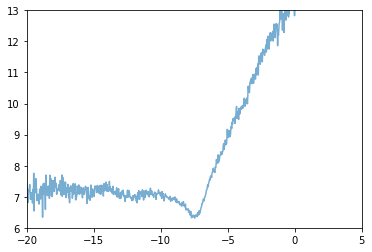

In [22]:
l=0
for i in range(l,m):
    
    x_lat = np.array(lat)
    lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr1)).argmin()])[0]
    lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (latr2)).argmin()])[0]    
    lats = lat[lat_ind1[0]:lat_ind2[0]]

    x_lon = lon
    
    maskm = np.ones((len(time),len(lats),len(lon)))

    for a in range(len(lats)):
        for b in range(len(lon)):
            if globe.is_land(lats[a], lon[b])==True:
                maskm[:,a,b] = math.nan
 
 ###  averaged theta at 800hPa and surface 
    theta_850 = ta1[:,1,:,:]*(100000/85000)**con
    theta_700 = ta1[:,2,:,:]*(100000/70000)**con
    theta_800 = theta_700 + ((2/3) * (theta_850 - theta_700))
    
    theta_sfc = tas1*(100000/psl1)**con

### CAOI at 800hPa
    M = theta_sfc - theta_800
    
    x_sfcWind = sfcWind1
    m_sfcWind = x_sfcWind[:,lat_ind1[0]:lat_ind2[0],:]

    x_M = M
    m_M = x_M[:,lat_ind1[0]:lat_ind2[0],:]
    
    cao = np.array(m_M)
    sw  = np.array(m_sfcWind)
    
    plot_CAOI = np.array(np.multiply(maskm,cao))
    wind      = np.array(np.multiply(maskm,sw))
    
    pl_theta  = plot_CAOI.reshape(-1)
    pl_wind   = wind.reshape(-1)
    
    plot_theta = pl_theta[pl_theta>-40]
    plot_wind  = pl_wind[pl_theta>-40]
    
    ind = np.argsort(plot_theta)
    xx = np.sort(plot_theta)
    yy = plot_wind[ind]
    
    indx = np.isnan(xx*yy)==False
    
    ######## U10 PDF ##################
#     from scipy.stats import norm
#     fig = plt.figure()
#     plt.plot(np.sort(yy[indx]), norm.pdf(np.sort(yy[indx])), label=modname[i])
#     # plt.legend()
#     plt.title(modname[i]+' - U10 PDF')
#     ######################################
    
#     ######## M PDF ##################
#     from scipy.stats import norm
#     fig = plt.figure()
#     plt.plot(xx[indx], norm.pdf(xx[indx]), label=modname[i])
#     # plt.legend()
#     plt.title(modname[i]+' - M PDF')
    ######################################
    
    
    from scipy import stats
    bin_means, bin_edges, binnumber = stats.binned_statistic(xx[indx], yy[indx], 'mean', bins=1000)
    bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx[indx], xx[indx], 'mean', bins=1000)

    index = np.isnan(bin_means_x*bin_means)==False
    
    plt.plot(bin_means_x[index], bin_means[index], label=modname[i], alpha=0.6)

# plt.legend()
# plt.ylabel('U10 [m/s]',fontsize='15')
# plt.xlabel('CAOI [K]',fontsize='15')
plt.xlim(-20,5)
plt.ylim(6,13)
# plt.title('GCM - M PDF')
# plt.title('U10 vs M for oceans between '+str(latr1)+'N to '+str(latr2)+'N')
# plt.savefig('../figures/U10vsM_50S_50N.png')

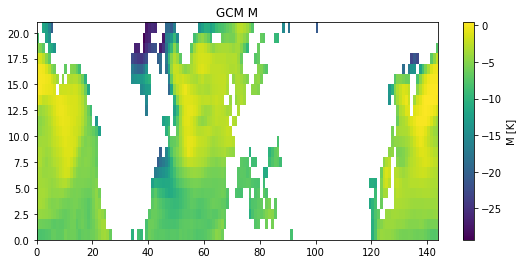

In [18]:
fig = plt.figure(figsize=(9,4))
plt.pcolormesh(plot_CAOI[33,:,:])
plt.title('GCM M')
cbar = plt.colorbar()
cbar.set_label('M [K]')

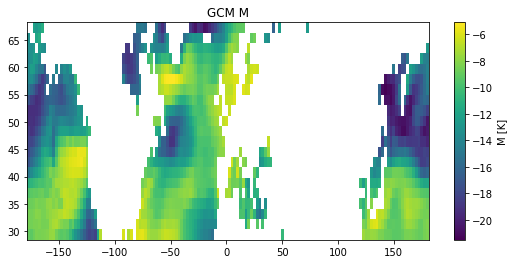

In [19]:
fig = plt.figure(figsize=(9,4))
plt.pcolormesh(lon, lats, plot_CAOI[15,:,:])
plt.title('GCM M')
cbar = plt.colorbar()
cbar.set_label('M [K]')

In [10]:
# from skmisc.loess import loess
# index = np.isnan(bin_means_x*bin_means)==False

# # plt.plot(bin_means_x, bin_means)
# l = loess(bin_means_x[index], bin_means[index])
# l.fit()
# pred = l.predict(bin_means_x[index], stderror=True)
# conf = pred.confidence()

# lowess = pred.values
# plt.plot(bin_means_x[index], lowess)
# plt.ylabel('U10 [m/s]',fontsize='15')
# plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('GCM-CESM2')

In [ ]:
# bin_means_x_gcm = bin_means_x[index]
# bin_means_gcm   = lowess

In [ ]:
# x_gcm = []
# y_gcm = []


In [ ]:
# x_gcm.append(bin_means_x_gcm)
# y_gcm.append(bin_means_gcm)

# Observations

In [23]:
import glob
merlist = np.sort(glob.glob('../data_merra/all_lat_lon/levels/MERRA2_*.nc'))
sfclist = np.sort(glob.glob('../data_merra/all_lat_lon/surface/MERRA2_*.nc'))
maclist = np.sort(glob.glob('../MACLWP_dailymean/take/wind1deg*.nc4'))

In [24]:
latr1 = 30
latr2 = 70

In [132]:
import netCDF4 as nc
import xarray as xr
p_mer_T   = []
p_mac_w   = []
sfc_mer_T = []
sfc_mer_P = []

for i in range(len(merlist)): #len(merlist)
    d_path = merlist[i]
    data   = nc.Dataset(d_path)
    # print(d_path)
    
    if i==0:
        merlat = data.variables['lat'][:]
        merlon = data.variables['lon'][:]
        merlev = data.variables['lev'][:]
        #shape latitude
        mer_lat = np.flip(merlat)
        mer_lat = np.array(mer_lat)
        mlat_ind1 = np.where(mer_lat == mer_lat.flat[np.abs(mer_lat - (latr1)).argmin()])[0]
        mlat_ind2 = np.where(mer_lat == mer_lat.flat[np.abs(mer_lat - (latr2)).argmin()])[0]
        p_mer_lat  = np.array(mer_lat[mlat_ind1[0]:mlat_ind2[0]])
        #shape longitude
        merlon[merlon > 180] = merlon[merlon > 180]-360
        # mer_lon = np.array(merlon)
        
    merT   = data.variables['T'][:] #(time, lev, lat, lon)
    mer_T = np.array(merT[:,:,::-1,:])
    p_mer_T.extend(mer_T[:,:,mlat_ind1[0]:mlat_ind2[0],:])
    
temp = np.array(p_mer_T)

for i in range(len(sfclist)): #len(merlist)
    s_path = sfclist[i]
    sdata  = nc.Dataset(s_path)
    # print(d_path)
    
    if i==0:
        sfclat = sdata.variables['lat'][:]
        sfclon = sdata.variables['lon'][:]
        #shape latitude
        sfc_lat = np.flip(sfclat)
        sfc_lat = np.array(sfc_lat)
        flat_ind1 = np.where(sfc_lat == sfc_lat.flat[np.abs(sfc_lat - (latr1)).argmin()])[0]
        flat_ind2 = np.where(sfc_lat == sfc_lat.flat[np.abs(sfc_lat - (latr2)).argmin()])[0]
        p_sfc_lat  = np.array(sfc_lat[flat_ind1[0]:flat_ind2[0]])
        #shape longitude
        sfclon[sfclon > 180] = sfclon[sfclon > 180]-360
        # sfc_lon = np.array(sfclon)
        
    sfcT   = sdata.variables['TS'][:] 
    sfc_T = np.array(sfcT[:,::-1,:])
    sfc_mer_T.extend(sfc_T[:,flat_ind1[0]:flat_ind2[0],:])
    
    sfcP   = sdata.variables['SLP'][:] 
    sfc_P = np.array(sfcP[:,::-1,:])
    sfc_mer_P.extend(sfc_P[:,flat_ind1[0]:flat_ind2[0],:])
    
sfctemp = np.array(sfc_mer_T)
sfcpres = np.array(sfc_mer_P)

for i in range(len(maclist)): #len(maclist)
    ddpath = maclist[i]
    ddata  = nc.Dataset(ddpath)
    macw   = ddata.variables['sfcwind'][:] #(time,lat,lon)
    # print(ddpath)
    
    if i==0:
        maclat = ddata.variables['lat'][:]
        maclon = ddata.variables['lon'][:]
        #shape latitude
        mac_lat = np.array(maclat)
        slat_ind1 = np.where(mac_lat == mac_lat.flat[np.abs(mac_lat - (latr1)).argmin()])[0]
        slat_ind2 = np.where(mac_lat == mac_lat.flat[np.abs(mac_lat - (latr2)).argmin()])[0]
        p_mac_lat  = np.array(mac_lat[slat_ind1[0]:slat_ind2[0]])
        #shape longitude
        maclon[maclon > 180] = maclon[maclon > 180]-360
        # mac_lon = np.array(maclon)

    n_w = macw[:,slat_ind1[0]:slat_ind2[0],:]
    p_mac_w.extend(n_w)

wind = np.array(p_mac_w)


In [36]:
# plot_indx = np.isnan(macw)==False

In [37]:
# np.where(plot_indx==True)

In [6]:
# test1 = merT[:,:,:,:]
# test2 = merT[:,:,::-1,:]
# test3 = test2[:,:,mlat_ind1[0]:mlat_ind2[0],:]
# print(test1[0,0,-1,0], test2[0,0,0,0], test2[0,0,mlat_ind1[0],10], test3[0,0,0,10])
# print(merT[0,0,-1,0], mer_T[0,0,0,0], mer_T[0,0,mlat_ind1[0],10], temp[-1,0,0,10])

In [133]:
mer_lon = []
mer_lon.extend(merlon[180:360])
mer_lon.extend(merlon[0:180])

sfc_lon = []
sfc_lon.extend(sfclon[180:360])
sfc_lon.extend(sfclon[0:180])

mac_lon = []
mac_lon.extend(maclon[180:360])
mac_lon.extend(maclon[0:180])



In [8]:
# print(merT[0,0,mlat_ind1[0],10],merT[0,0,-(mlat_ind1[0]+1),10])
# print(mer_T[0,0,-(mlat_ind1[0]+1),10],mer_T[0,0,mlat_ind1[0],10])
# print(temp[0,0,0,10])

In [9]:
# print('MERRA2 surface latitude range: ',p_sfc_lat[0],p_sfc_lat[-1])
# print('MERRA2 800hPa latitude range: ',p_mer_lat[0],p_mer_lat[-1])
# print('MAC surface latitude range: ',p_mac_lat[0],p_mac_lat[-1])
# print('MERRA2 surface longitude range: ',sfc_lon[0],sfc_lon[-1])
# print('MERRA2 800hPa longitude range: ',mer_lon[0],mer_lon[-1])
# print('MAC surface longitude range: ',mac_lon[0],mac_lon[-1])

In [10]:
# print(np.shape(temp), np.shape(sfctemp), np.shape(sfcpres), np.shape(wind))

In [11]:
merlev

masked_array(data=[850., 800., 750.],
             mask=False,
       fill_value=1e+20)

In [134]:
p_level = 1

In [135]:
theta_800 = np.array(np.multiply(temp[:,p_level,:,:], (100000/(merlev[p_level]*100))**(Rd/Cp)))

In [136]:
theta_sfc = np.array(np.multiply(sfctemp, (100000/sfcpres)**(Rd/Cp)))


In [137]:
p_CAOI = np.array(np.subtract(theta_sfc,theta_800))


In [43]:
# len(temp)

In [138]:
maskm = np.ones((len(temp),len(p_mer_lat),len(mer_lon)))

for a in range(len(p_mer_lat)):
    for b in range(len(mer_lon)):
        if globe.is_land(p_mer_lat[a], mer_lon[b])==True:
            maskm[:,a,b] = math.nan

In [139]:
caoi_test = p_CAOI
wind_test = wind

In [140]:
plot_CAOI = np.ones((len(temp),len(p_mer_lat),len(mer_lon)))
plot_CAOI[:,:,180:360] = caoi_test[:,:,0:180]
plot_CAOI[:,:,0:180]   = caoi_test[:,:,180:360]
plot_CAOI = np.array(plot_CAOI)

In [141]:
plot_wind = np.ones((len(temp),len(p_mer_lat),len(mer_lon)))
plot_wind[:,:,180:360] = wind_test[:,:,0:180]
plot_wind[:,:,0:180]   = wind_test[:,:,180:360]
plot_wind = np.array(plot_wind)

In [142]:
plot_CAOI = np.array(np.multiply(maskm,plot_CAOI))
plot_wind = np.array(np.multiply(maskm,plot_wind))


In [143]:
plot_indx = np.isnan(plot_CAOI*plot_CAOI)==False

In [144]:
print(np.shape(plot_CAOI[plot_indx]))
print(np.shape(plot_wind[plot_indx]))

(7043992,)
(7043992,)


In [145]:
plot_mer_theta = plot_CAOI[plot_indx]
plot_mac_wind  = plot_wind[plot_indx]

In [90]:
print(np.max(plot_mer_theta), np.max(plot_mac_wind))

23.558611890949408 36.85054397583008


In [91]:
print(np.min(plot_mer_theta), np.min(plot_mac_wind))

-42.267012601174144 -99.98999786376953


In [147]:
ind = np.argsort(plot_mer_theta)
xx = np.sort(plot_mer_theta)
yy = plot_mac_wind[ind]

In [148]:
# x_new = xx[xx<np.max(xx)]
# y_new = yy[xx<np.max(xx)]

# xx_new = x_new[y_new>0]
# yy_new = y_new[y_new>0]

xx_new = xx[yy>0]
yy_new = yy[yy>0]

In [191]:
print('M ', np.max(xx_new), np.min(xx_new))
print('wind ', np.max(yy_new), np.min(yy_new))

M  23.558611890949408 -31.826821927310448
wind  36.85054397583008 0.0001569862215546891


(-10.0, 10.0)

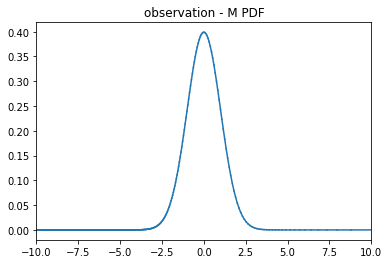

In [200]:
from scipy.stats import norm
plt.plot(xx_new, norm.pdf(xx_new))
plt.title('observation - M PDF')
plt.xlim(-10,10)

In [196]:
print(np.shape(yy_new), np.shape(norm.pdf(yy_new)))

(6539954,) (6539954,)


Text(0.5, 1.0, 'observation - sfcWind PDF')

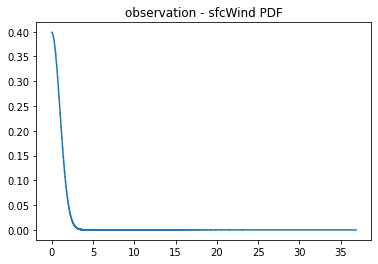

In [203]:
from scipy.stats import norm
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
test_yy_new = np.sort(yy_new)
plt.plot(test_yy_new, norm.pdf(test_yy_new))  
plt.title('observation - sfcWind PDF')

In [28]:
# print(np.shape(sfc_lon), np.shape(p_sfc_lat), np.shape(p_CAOI), np.shape(plot_CAOI))

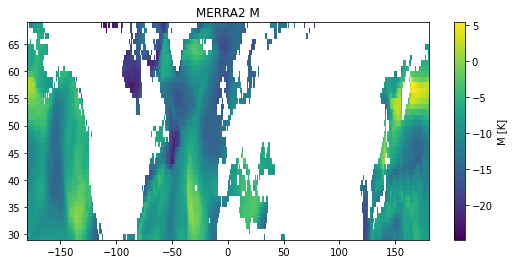

In [68]:
fig = plt.figure(figsize=(9,4))
plt.pcolormesh(sfc_lon, p_sfc_lat, plot_CAOI[100,:,:])
plt.title('MERRA2 M')
cbar = plt.colorbar()
cbar.set_label('M [K]')

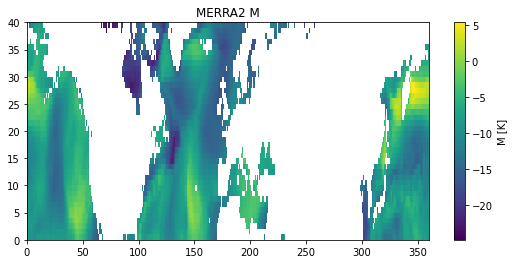

In [92]:
fig = plt.figure(figsize=(9,4))
plt.pcolormesh(plot_CAOI[100,:,:])
plt.title('MERRA2 M')
cbar = plt.colorbar()
cbar.set_label('M [K]')

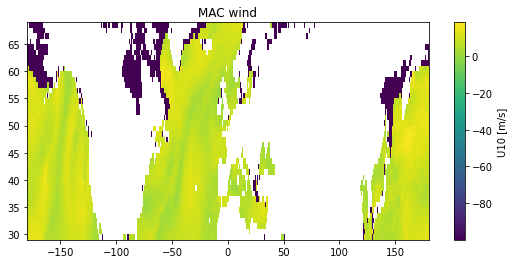

In [70]:
fig = plt.figure(figsize=(9,4))
plt.pcolormesh(mac_lon, p_mac_lat, plot_wind[100,:,:]) #
plt.title('MAC wind')
cbar = plt.colorbar()
cbar.set_label('U10 [m/s]')

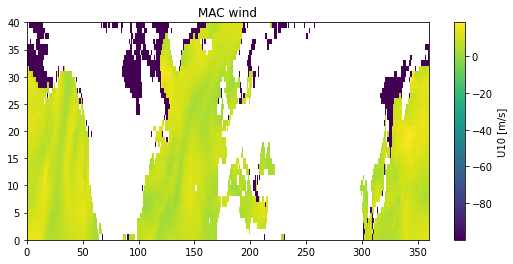

In [93]:
fig = plt.figure(figsize=(9,4))
plt.pcolormesh(plot_wind[100,:,:]) #
plt.title('MAC wind')
cbar = plt.colorbar()
cbar.set_label('U10 [m/s]')

In [159]:
indx = np.isnan(xx_new*yy_new)==False

In [160]:
len(xx_new[indx])

6539954

In [172]:
from scipy import stats
bin_means, bin_edges, binnumber = stats.binned_statistic(xx_new[indx], yy_new[indx], 'mean', bins=500)
bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx_new[indx], xx_new[indx], 'mean', bins=500)


In [176]:
np.min(bin_edges)

-31.826821927310448

In [162]:
index = np.isnan(bin_means_x*bin_means)==False

Text(0.5, 1.0, 'observation - M PDF')

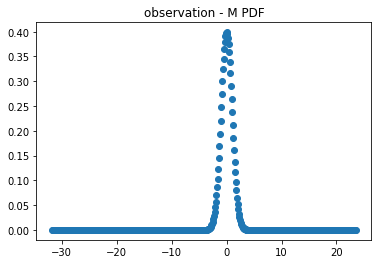

In [201]:
from scipy.stats import norm
plt.scatter(bin_means_x[index],norm.pdf(bin_means_x[index])) #bin_means_x[index],  
plt.title('observation - M PDF')

Text(0.5, 1.0, 'observation - U10 PDF')

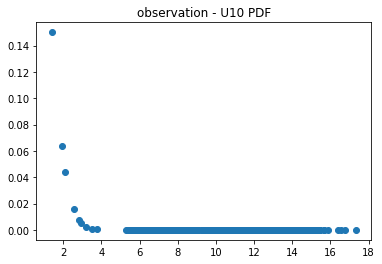

In [202]:
from scipy.stats import norm
plt.scatter(bin_means[index],norm.pdf(bin_means[index])) #bin_means_x[index],  
plt.title('observation - U10 PDF')

In [32]:
yti = str(int(merlev[p_level]))

In [33]:
yti

'800'

## 50S 50N oceans theta 800hPa

Text(0.5, 1.0, 'U10 vs M for oceans between -50N to 50N')

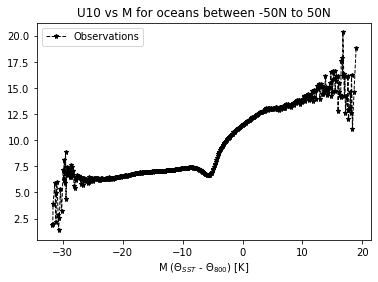

In [34]:
plt.plot(bin_means_x[index], bin_means[index], color='black' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='Observations')
plt.legend()
yti = str(int(merlev[p_level]))
plt.xlabel(r"M ($\Theta_{SST}$ - $\Theta_{"+yti+"})$ [K]")
plt.title('U10 vs M for oceans between '+str(latr1)+'N to '+str(latr2)+'N')


Text(0.5, 1.0, 'U10 vs M for oceans between -50N to 50N')

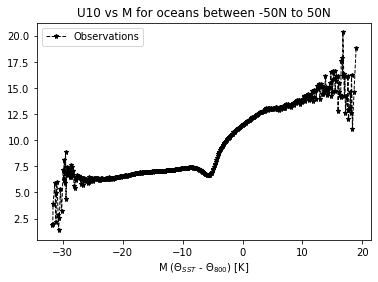

In [ ]:
plt.plot(bin_means_x[index], bin_means[index], color='black' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='Observations')
plt.legend()
yti = str(int(merlev[p_level]))
plt.xlabel(r"M ($\Theta_{SST}$ - $\Theta_{"+yti+"})$ [K]")
plt.title('U10 vs M for oceans between '+str(latr1)+'N to '+str(latr2)+'N')

## 30N 70N oceans theta 850hPa

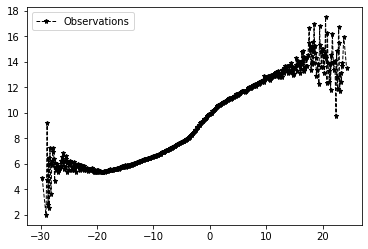

In [34]:
plt.plot(bin_means_x[index], bin_means[index], color='black' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='Observations')
plt.legend()

## 30N 70N oceans theta 800hPa

Text(0.5, 1.0, 'U10 vs M for oceans between 30N to 70N')

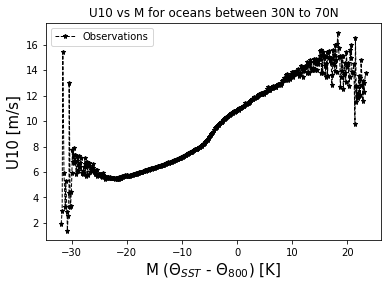

In [64]:
plt.plot(bin_means_x[index], bin_means[index], color='black' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='Observations')
plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
yti = str(int(merlev[p_level]))
plt.xlabel(r"M ($\Theta_{SST}$ - $\Theta_{"+yti+"})$ [K]",fontsize='15')
plt.title('U10 vs M for oceans between '+str(latr1)+'N to '+str(latr2)+'N')

Text(0.5, 1.0, 'U10 vs M for oceans between 30N to 70N')

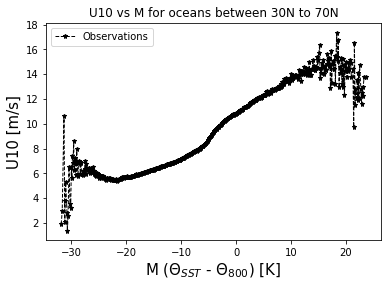

In [78]:
plt.plot(bin_means_x[index], bin_means[index], color='black' ,marker='*', linestyle='dashed',
     markersize=5,linewidth=1, label='Observations')
plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
yti = str(int(merlev[p_level]))
plt.xlabel(r"M ($\Theta_{SST}$ - $\Theta_{"+yti+"})$ [K]",fontsize='15')
plt.title('U10 vs M for oceans between '+str(latr1)+'N to '+str(latr2)+'N')

In [ ]:
bin_means_x_obs = bin_means_x[index]
bin_means_obs   = lowess

In [ ]:
fig= plt.figure(figsize=(5, 6))
plt.plot(bin_means_x_obs, bin_means_obs, label='MACLWP+MERRA2')
plt.plot(bin_means_x_gcm, bin_means_gcm, label='CESM2')
plt.xticks(np.arange(-20,6,5),fontsize='12')
plt.yticks(np.arange(4,13),fontsize='12')
plt.xlim([-20,5])
plt.ylim([3,13])
plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('MACLWP wind vs MERRA2 M\nfor 30N to 70N ocean only\n850hPa')

# PPE

In [35]:
enn = np.arange(201,251)

In [36]:
ppe_var = ['U10', 'PSL', 'T850','TREFHT']

In [37]:
for en in enn:
    if en != 175:
        for i in ppe_var: #TREFHT was used since no TS. Should double check this.
            d_path = '/glade/campaign/cgd/projects/ppe/cam_ppe/rerun_PPE_250/PD/PD_timeseries/PPE_250_ensemble_PD.'+f'{en:03d}'+'/atm/hist/cc_PPE_250_ensemble_PD.'+f'{en:03d}'+'.h1.'+str(i)+'.nc'
            data =xr.open_dataset(d_path)

            if en == enn[0]:
                lon  = data.variables['lon'][:]  #(lon: 288) [0.0, 1.25, 2.5, ... 356.25, 357.5, 358.75]
                lat  = data.variables['lat'][:]  #(lat: 192) [-90.0 , -89.057592, -88.115183, ... 88.115183,  89.057592, 90.0]
                time = data.variables['time'][:] #(time: 36)

            locals()[str(en)+'_'+i] = data.variables[i][:]

In [38]:
x_lat = np.array(lat)
lat_ind1 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (30)).argmin()])[0]
lat_ind2 = np.where(x_lat == x_lat.flat[np.abs(x_lat - (70)).argmin()])[0]
lat_new  = lat[lat_ind1[0]:lat_ind2[0]]

mask = np.ones((1096,len(lat_new),len(lon)))

for a in range(len(lat_new)):
    for b in range(len(lon)):
        if globe.is_land(lat_new[a], lon[b]-180.)==True:
            mask[:,a,b] = 0

for en in enn:
    if en != 175:
        # print(en)
        for i in ppe_var: #
            tmp  = locals()[str(en)+'_'+i]
            tmp2 = tmp[0:1096,lat_ind1[0]:lat_ind2[0],:]
            locals()['MID'+i+'_'+str(en)] = np.multiply(mask,tmp2)

In [39]:
for en in enn:
    if en != 175:
        locals()['theta_850_'+str(en)] = np.multiply(locals()['MIDT850_'+str(en)],(np.divide(locals()['MIDPSL_'+str(en)],85000))**(Rd/Cp))

In [ ]:
np.shape(theta_850_247)

In [40]:
for en in enn:
    if en != 175:
        locals()['M_'+str(en)]   = np.array(np.subtract(locals()['MIDTREFHT_'+str(en)],locals()['theta_850_'+str(en)])).reshape(-1)
        locals()['U10_'+str(en)] = np.array(locals()['MIDU10_'+str(en)]).reshape(-1)

In [ ]:
np.max(U10_246)

In [ ]:
from scipy import stats
from skmisc.loess import loess

Text(0.5, 0, 'CAOI [K]')

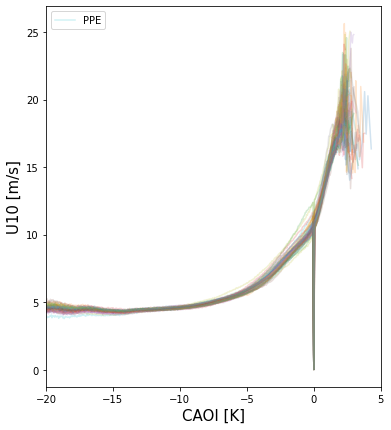

In [42]:
fig= plt.figure(figsize=(6, 7))
# plt.plot(bin_means_x_gcm, bin_means_gcm,color='magenta' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='CESM2') #marker='*', markersize=12,
# plt.plot(bin_means_x_obs, bin_means_obs,color='blue' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='Observations')
for en in enn:
    if en != 175:
        x = locals()['M_'+str(en)]
        y = locals()['U10_'+str(en)]
        ind = np.argsort(x)
        xx = np.sort(x)
        yy = y[ind]

        indx = np.isnan(xx*yy)==False

        bin_means, bin_edges, binnumber = stats.binned_statistic(xx[indx], yy[indx], 'mean', bins=1000)
        bin_means_x, bin_edges_x, binnumber_x = stats.binned_statistic(xx[indx], xx[indx], 'mean', bins=1000)

        index = np.isnan(bin_means_x*bin_means)==False

        # plt.plot(bin_means_x, bin_means)
#         l = loess(bin_means_x[index], bin_means[index])
#         l.fit()
#         pred = l.predict(bin_means_x[index], stderror=True)
#         conf = pred.confidence()

#         lowess = pred.values


        if en==250:
            plt.plot(bin_means_x[index], bin_means[index], alpha=0.2,label='PPE')

        else:
            plt.plot(bin_means_x[index], bin_means[index], alpha=0.2)
    

# plt.plot(bin_means_x_obs, bin_means_obs, label='MACLWP+MERRA2')
# plt.plot(bin_means_x_gcm, bin_means_gcm, label='CESM2')
# plt.xticks(np.arange(-20,6,5),fontsize='12')
# plt.yticks(np.arange(4,13),fontsize='12')
# plt.plot(bin_means_x_gcm, bin_means_gcm,color='magenta' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='CESM2')
# plt.plot(bin_means_x_obs, bin_means_obs,color='blue' ,marker='*', linestyle='dashed',
#      markersize=5,linewidth=1, label='Observations')
plt.xlim([-20,5])

plt.legend()
plt.ylabel('U10 [m/s]',fontsize='15')
plt.xlabel('CAOI [K]',fontsize='15')
# plt.title('CAM6 PPE')
# plt.savefig('ppe.png')